<h3> ESM2 SDI - cours de PROBA <div style="float:right"><img class="w3-card-4"
     src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Logo_de_l%27acad%C3%A9mie_militaire_de_Saint-Cyr_Co%C3%ABtquidan.svg/1200px-Logo_de_l%27acad%C3%A9mie_militaire_de_Saint-Cyr_Co%C3%ABtquidan.svg.png"
                                                                          width="100px" object-position="right top"></div></h3>
<div style="clear:both"></div>

<center>
    <h1> TP1 : Densité et simulation de lois (solutions)  </h1>
</center>



In [15]:
from pylab import *

In [19]:
%%html
<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-color:#c0cfc0;
  position: static;
}  
h2 {
  padding: 8px 12px;
  background-color:#c0cfb0;
  position: static;
}   
h3 {
  padding: 4px 8px;
  background-color:#c0cfa0;
  position: static;
}   
</style>

In [2]:
rcParams['figure.figsize'] = (12,8) #on fixe la taille des figures qui seront générées dans ce notebook

## 1. Densités et fonctions de répartition de variables aléatoires

### 1.1 Quelques variables aléatoires continues

**Q01:** Compléter le code suivant permettant de représenter graphiquement les fonctions densités d'une loi uniforme $\mathcal{U}([a;b])$, d'une loi normale $\mathcal{N}(\mu,\sigma)$.

In [3]:
def duniforme(x,a,b):
    if a<x<b:
        y=1/(b-a)
    else:
        y=0
    return y

def dnormale(x,mu,sigma):
    y=1/sigma/sqrt(2*pi)*exp(-(x-mu)**2/2/sigma**2)
    return y

In [4]:
min = -5
max = +5
dx = 1e-3
grid = arange(min,max,dx)

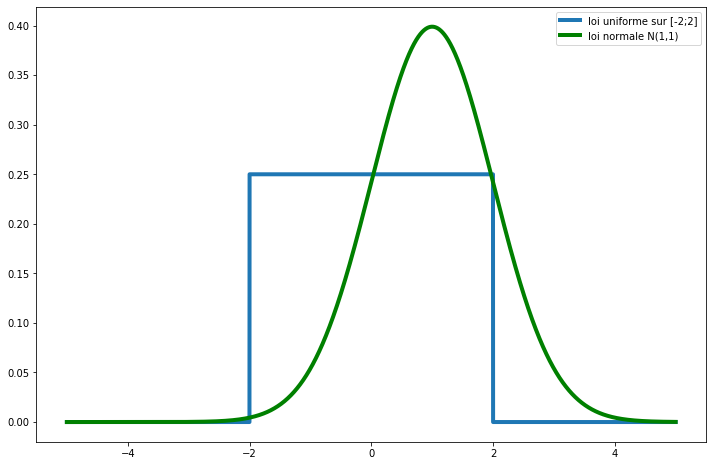

In [5]:
plot(grid, [duniforme(x,-2,2) for x in grid],linewidth=4)
plot(grid, [dnormale(x,1,1) for x in grid],linewidth=4,color='green')
legend(['loi uniforme sur [-2;2]','loi normale N(1,1)'])
show()

**Q02:** Tracer sur un même graphique la fonction densité d'une loi exponentielle $\mathcal{E}(1/2)$ et sa fonction de répartition.

In [6]:
def dexponentielle(x,la):
    if x<0:
        y=0
    else:
        y=la*exp(-la*x)
    return y

def rexponentielle(x,la):
    if x<0:
        y=0
    else:
        y=1-exp(-la*x)
    return y

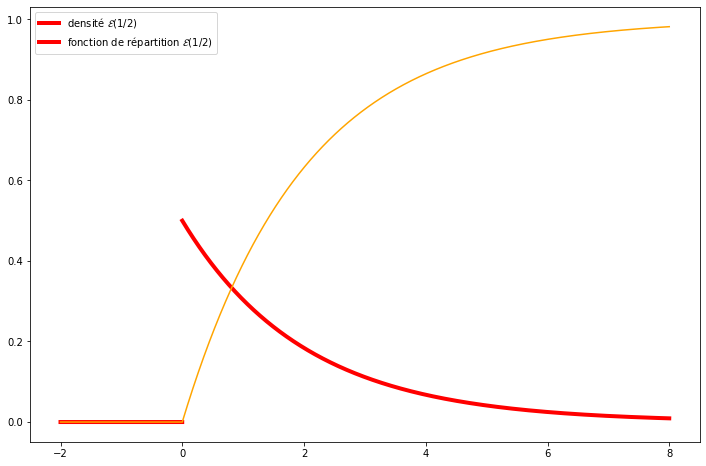

In [7]:
min = -2
max = +8
dx = 1e-3
grid = arange(min, max,dx)
grid1= arange(min, 0,dx)
grid2= arange(0, max,dx)
plot(grid1, [dexponentielle(x,0.5) for x in grid1],color='red',linewidth=4)
plot(grid2, [dexponentielle(x,0.5) for x in grid2],color='red',linewidth=4)
plot(grid, [rexponentielle(x,0.5) for x in grid],color='orange')
legend(['densité $\mathcal{E}(1/2)$','fonction de répartition $\mathcal{E}(1/2)$'])
show()

**Q03:** Tracer sur un même graphique la fonction densité d'une loi normale $\mathcal{N}(1,2)$ et sa fonction de répartition, puis faire de même pour une loi normale $\mathcal{N}(1,1/2)$.

In [8]:
from scipy.stats import norm

In [9]:
rcParams['figure.figsize'] = (18,8)

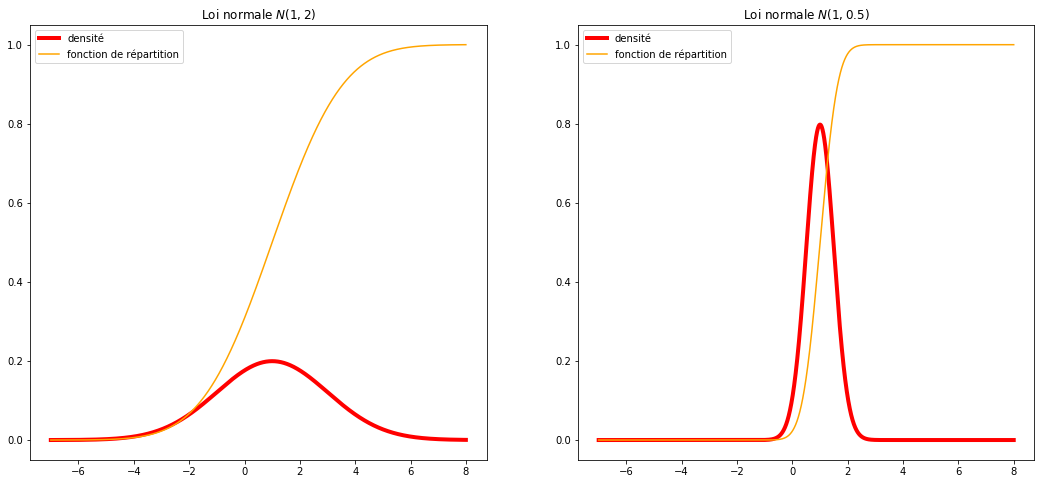

In [10]:
min = -7
max = +8
dx = 1e-3
grid = arange(min,max,dx)

subplot(1,2,1)
sigma=2
plot(grid, [dnormale(x,1,sigma) for x in grid],color='red',linewidth=4)
plot(grid,norm.cdf(grid,1,sigma),color='orange')
legend(['densité','fonction de répartition'])
title('Loi normale ${N}(1,2)$')
subplot(1,2,2)
sigma=0.5
plot(grid, [dnormale(x,1,sigma) for x in grid],color='red',linewidth=4)
plot(grid,norm.cdf(grid,1,sigma),color='orange')
legend(['densité','fonction de répartition'])
title('Loi normale ${N}(1,0.5)$')
show()

In [11]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [12]:
def normales(m,s):
    plot(grid, [dnormale(x,m,s) for x in grid],color='red',linewidth=4)
    plot(grid,norm.cdf(grid,m,s),color='orange')
    legend(['densité','fonction de répartition'])
    title('Loi normale ${N}(1,2)$')
    show()

In [13]:
interact(normales,m=(-4,4),s=(0.1,1.5))

interactive(children=(IntSlider(value=0, description='m', max=4, min=-4), FloatSlider(value=0.7999999999999999…

<function __main__.normales(m, s)>

### 1.2 Quelques variables aléatoires discrètes

On calcule un coefficient binomial à l'aide de la librairie scipy.special et de la fonction binom() :


In [14]:
import scipy.special

**Q04:** A l'aide du programme suivant, calculer $\binom{100}{27}$.

In [15]:
n=100
k=27
print(long(scipy.special.binom(n,k)))

1917353200780442800750592


**Q05:** Compléter le programme suivant afin de représenter graphiquement une loi binomiale $\mathcal{B}(n,p)$, et afin d'afficher l'espérance et la variance.

In [16]:
p=0.4
n=40
binomiale=[]
for k in range(n+1):
    pr1=scipy.special.binom(n,k)*p**(k)*(1-p)**(n-k)
    binomiale.append(pr1)

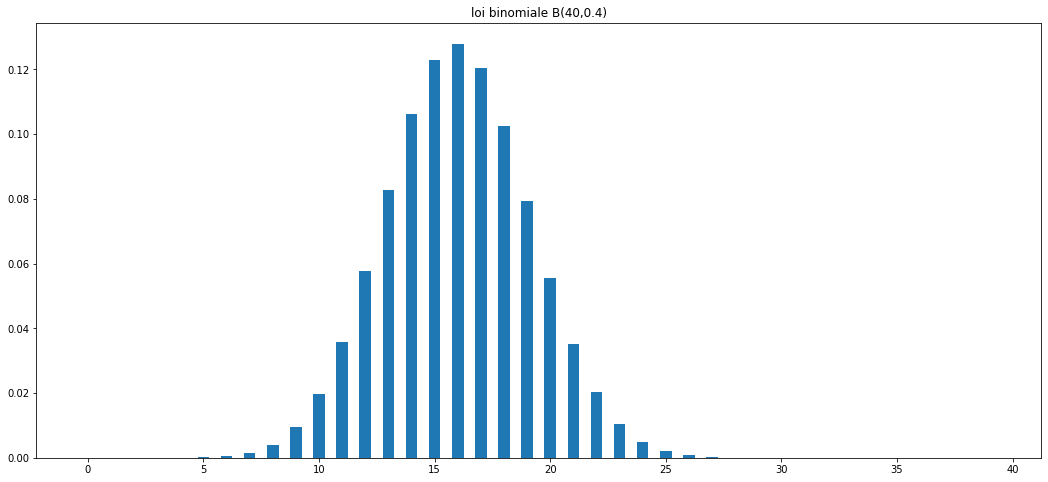

Espérance = 16.0
Variance = 9.6


In [17]:
min = 0
max = n
bar(range(min,max),binomiale[min:max],0.5)
title('loi binomiale B({},{})'.format(n,p))
show()
esp = n*p
var = n*p*(1-p)
print('Espérance = '+str(esp))
print('Variance = '+str(var))

**Q06:** Compléter le programme suivant afin de représenter graphiquement une loi géométrique $\mathcal{G}(p)$.

In [18]:
p=0.4
stop = 30
geometrique=[]
for k in range(1,stop):
    pr1=p*(1-p)**(k-1)
    geometrique.append(pr1)

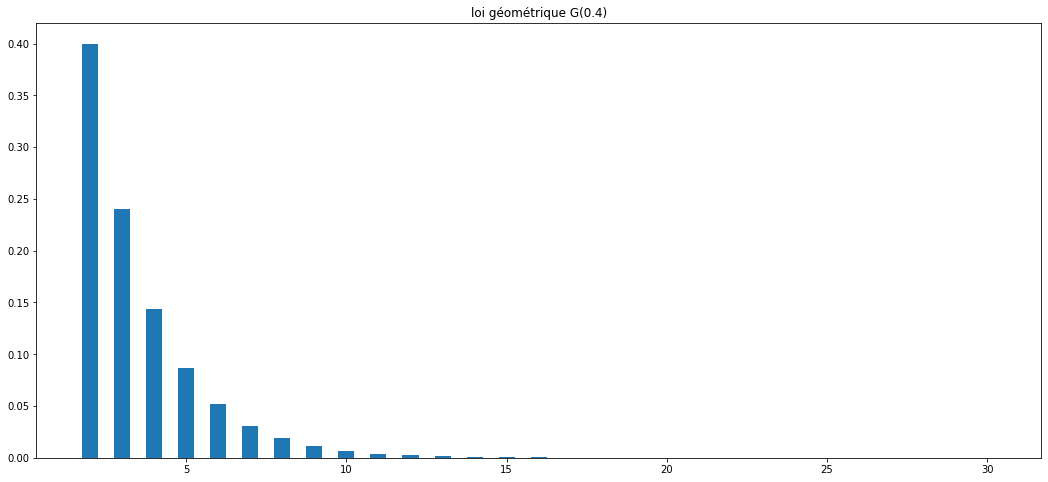

In [19]:
min = 1
max = stop
bar(range(min+1,max+1),geometrique[0:max-1],0.5)
title('loi géométrique G({})'.format(p))
show()


**Q07:** Modifier le programme précédent afin d'afficher uniquement les probabilités supérieures à $10^{-3}$

In [20]:
eps=1e-3
p=0.4
geometrique=[p]
k=2
while geometrique[-1]>eps:
    pr1=p*(1-p)**(k-1)
    k=k+1
    geometrique.append(pr1)

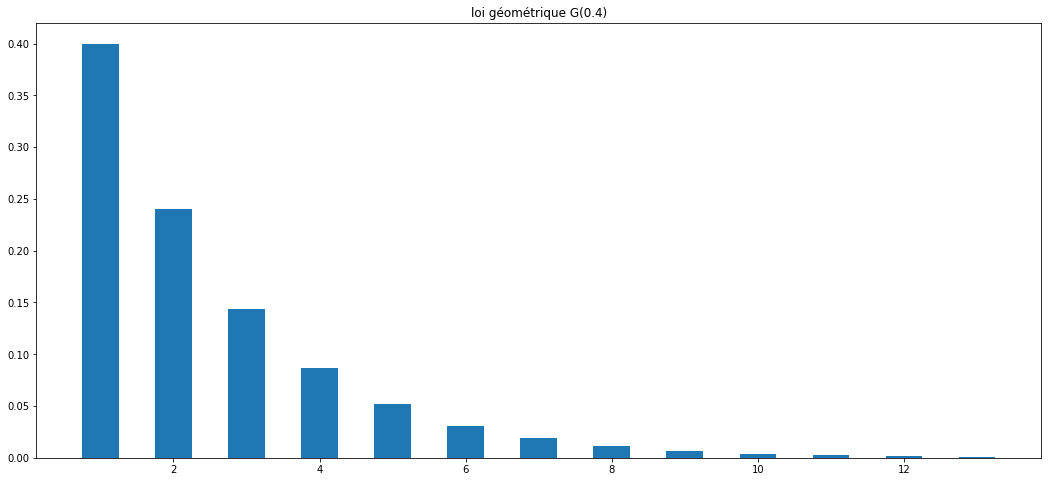

In [21]:
min = 1
max = k
bar(range(min,max),geometrique[min-1:max-1],0.5)
title('loi géométrique G({})'.format(p))
show()

**Q08:** Représenter graphiquement une loi géométrique et sa fonction de répartition.

In [22]:
eps=1e-3
p=0.4
geometrique=[p]
cgeometrique=[0,p]
k=2
while geometrique[-1]>eps:
    pr1=p*(1-p)**(k-1)
    k=k+1
    geometrique.append(pr1)
    cgeometrique.append(cgeometrique[-1]+pr1)

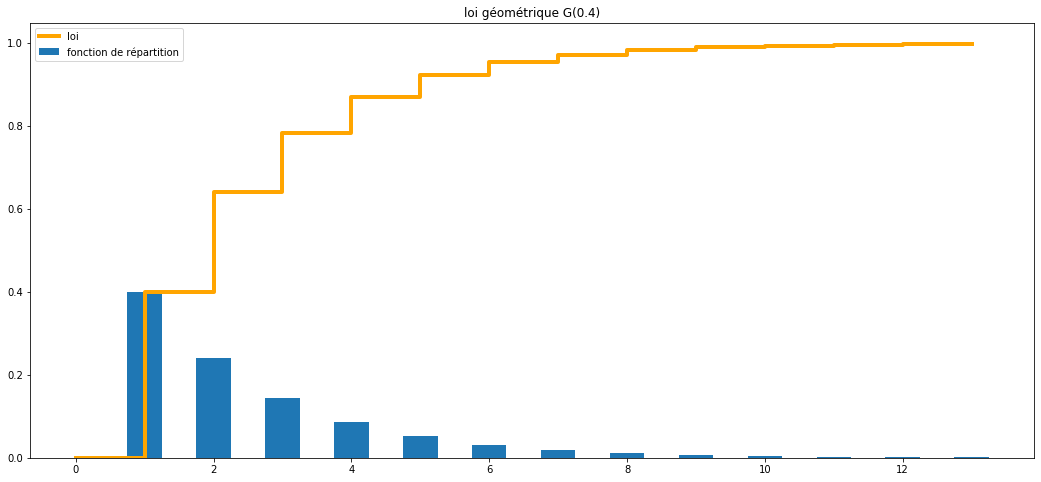

In [23]:
min = 1
max = k
bar(range(min,max),geometrique[min-1:max-1],0.5)
step(range(min-1,max),cgeometrique[min-1:max],where='post',color='orange',linewidth=4)
title('loi géométrique G({})'.format(p))
legend(['loi','fonction de répartition'])
show()

## 2. Simulation de lois

### 2.1 Générateur uniforme

Le but d'un générateur uniforme est de fournir un nombre entre $0$ et $1$ qui simule une réalisation d'une variable aléatoire suivant une loi uniforme sur l'intervalle $[0;1]$. Le principe d'un générateur aléatoire est le suivant : on part d'une valeur initiale $x_0$ appellée "graine" (ou "seed" en anglais) et on lui applique une relation de récurrence qui permet de générer une suite $(x_n)$. C'est une démarche déterministe mais cette suite doit passer un certain nombre de tests statistiques qui vérifie l'équirépartition des valeurs de la suite sur l'intervalle $[0;1]$. 

Un tel générateur est présent dans tous les langages de programmation (souvent appelé rand, random...). Il est indispensable pour simuler d'autres lois de probabilité. 

**Q09:** Exécuter la fonction rand() quatre fois d'affilée, sans fixer de graine. Recommencer l'opération. Qu'observe-t-on ?

In [24]:
print("\n On lance 4 fois le générateur sans fixer de graine : ")
for i in range(4):
    print(rand())


 On lance 4 fois le générateur sans fixer de graine : 
0.7796698851281313
0.19445938182028044
0.08047359887980399
0.8431558116818608


In [25]:
print("\n On relance 4 fois le générateur sans fixer de graine : ")
for i in range(4):
    print(rand())


 On relance 4 fois le générateur sans fixer de graine : 
0.1648721556267353
0.1054772462118787
0.5972015375281633
0.2391790112223


**Q10:** Fixer une graine à 1 puis exécuter la fonction rand() quatre fois d'affilée. Recommencer l'opération. Qu'observe-t-on ?

In [26]:
print("\n On fixe une graine : ")
seed(seed=1)
print(rand())
print(rand())
print(rand())
print(rand())
print("\n On reprend la même graine : ")
seed(seed=1)
print(rand())
print(rand())
print(rand())
print(rand())


 On fixe une graine : 
0.417022004702574
0.7203244934421581
0.00011437481734488664
0.30233257263183977

 On reprend la même graine : 
0.417022004702574
0.7203244934421581
0.00011437481734488664
0.30233257263183977


Un générateur fréquemment utilisé est celui de Lehmer (1948). La suite se construit selon la formule de récurrence suivante : 

$$\begin{cases} x_0 &=& 47594118 \\ x_{n+1} &\equiv & 23x_n \pmod{(10^8+1)} \end{cases}$$

Le principe est de générer un entier $n$ compris entre $0$ et $10^8$ puis de considérer $\frac{n}{10^8} \in [0;1]$.

**Q11:** Afficher les dix premiers termes de la suite construite par le générateur de Lehmer. On rappelle que la commande $\texttt{a%b}$ permet de calculer $a$ modulo $b$.

In [27]:
x=47594118
n=10
m=10**8
for i in range(n):
    x=(23*x)%(m+1)
    y=x/m
    print(y)

0.94664704
0.77288171
0.77627916
0.85442051
0.65167154
0.98844528
0.73424122
0.8875479
0.4136015
0.51283441


**Q12:** Générer les 10000 premiers termes de la suite de Lehmer et représenter la distribution des résultats à l'aide d'un histogramme. La distribution vous semble-t-elle uniforme sur $[0;1]$ ?

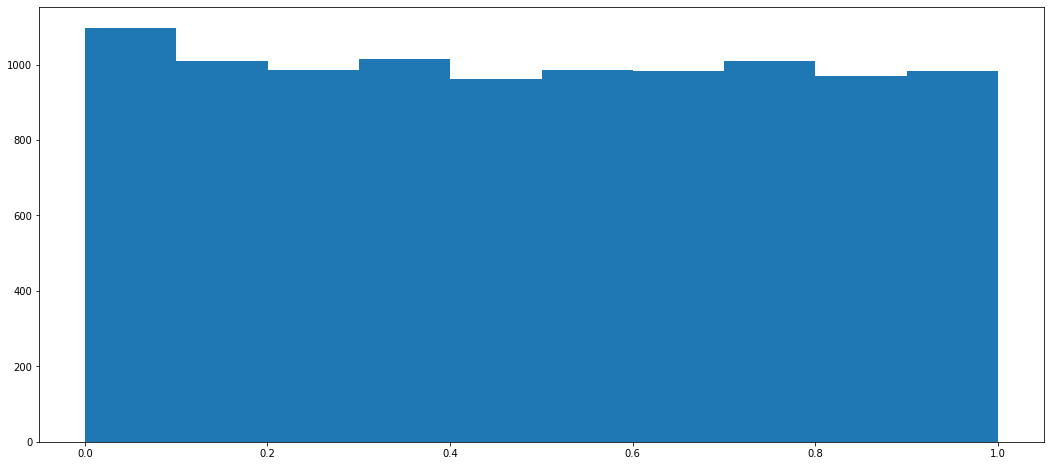

In [28]:
x=47594118
n=10000      #Nombre de tirages aléatoires
m=10**8
Y=[x/m]
for i in range(n):
    x=(23*x)%(m+1)
    y=x/m
    Y.append(y)
P=hist(Y)

Voici un modèle plus général de générateur : $$\begin{cases} x_0 &=& ... \\ x_{n+1} &\equiv & ax_n +c \pmod{m} \end{cases}$$

Le générateur de Robert Sedgewick est basé sur les valeurs suivantes : $a=31415821$, $c=1$, $m=10^8$.

**Q13:** Générer les 10000 premiers termes de la suite de Sedgewick et représenter la distribution des résultats à l'aide d'un histogramme. La distribution vous semble-t-elle uniforme sur $[0;1]$ ?

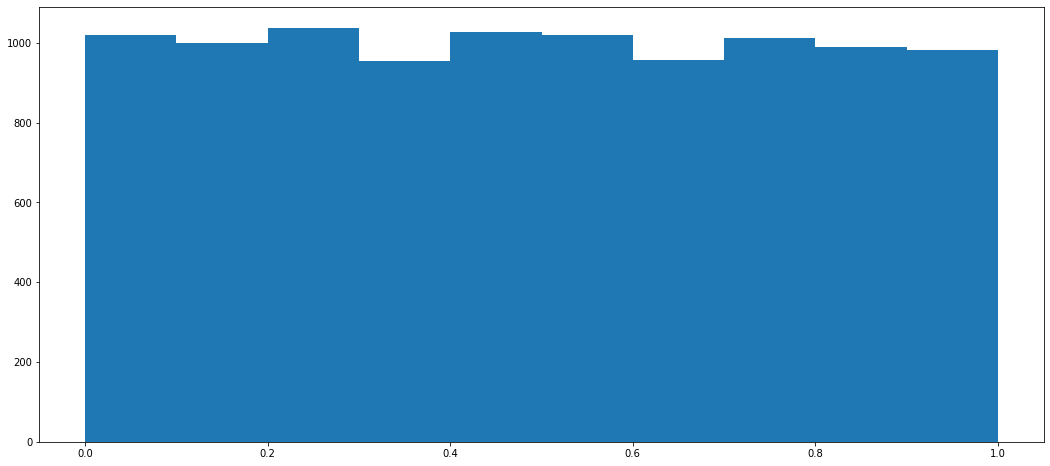

In [29]:
x=4759411
n=10000
m=10**8
a=31415821
c=1
Y=[x/m]
for i in range(n):
    x=(a*x+c)%m
    y=x/m
    Y.append(y)
P=hist(Y)

#### **Pour traiter les questions suivantes, on se limitera à l'utilisation de la fonction rand() de la librairie de Python.**

### 2.2 Simulation d'une loi uniforme sur $[a;b]$.

**Q14:** Simuler un tirage aléatoire selon une loi uniforme sur $[0;3]$ et afficher 10 résultats.

In [30]:
for i in range(10):
    y=rand()*3
    print(y)

0.44026767245133913
0.2770157843063934
0.5587806341330127
1.0366821811291431
1.1903024226920098
1.6164502020100708
1.2575835432098845
2.0556585011902784
0.6133567491945523
2.6343523091728365


**Q15:** Simuler un tirage aléatoire selon une loi uniforme sur $[-1;1]$ et afficher 10 résultats.

In [31]:
for i in range(10):
    print(2*rand()-1)

-0.9452248136041477
0.34093502035680445
-0.16539039526574606
0.11737965689150331
-0.7192261228095325
-0.6037970218302424
0.6014891373510733
0.936523151438795
-0.3731516436815143
0.38464523133862816


**Q16:** Ecrire une fonction permettant de simuler un tirage aléatoire selon une loi uniforme sur $[a;b]$.

In [32]:
def Uniforme(a,b):
    y=a+(b-a)*rand()
    return y

In [33]:
for i in range(10):
    print(Uniforme(100,110))

108.76389152296038
108.94606663503848
100.85044211369778
100.39054783232882
101.69830419564569
108.78142503429413
100.9834683383305
104.21107625005052
109.57889530150501
105.33165284973018


### 2.3 Simulation d'une loi binomiale

**Q17:** Toujours à l'aide de la fonction rand(), écrire une fonction permettant de simuler un tirage aléatoire selon une loi de Bernoulli $\mathcal{B}(p)$.

In [34]:
def Bernoulli(p):
    U=rand()
    if U<p:
        y=1
    else:
        y=0
    return y

In [35]:
p=0.2
for i in range(10):
    print(Bernoulli(p))

0
0
0
0
1
0
0
0
0
0


**Q18:** Ecrire une fonction permettant de simuler un tirage aléatoire selon une loi binomiale $\mathcal{B}(n,p)$.

In [36]:
def Binomiale(n,p):
    S=0
    for i in range(n):
        S=S+Bernoulli(p)
    return S

**Q19:** Ecrire un programme permettant de calculer la moyenne des résultats obtenus sur 1000 simulations d'une loi binomiale $\mathcal{B}(50,0.2)$ et interpréter le résultat.

In [37]:
N=1000
n=50
p=0.2
S=0
for i in range(N):
    S=S+Binomiale(n,p)
print(S/N)

10.073


### 2.4 Simulation par inversion de la fonction de répartition

**Q20:** Soit $U$ une variable aléatoire suivant une loi uniforme sur l'intervalle $[0;1]$ et $\lambda >0$. Soit la variable aléatoire $V=-\frac{1}{\lambda}\ln(U)$. Quelle est la loi suivie par $V$ ? 

<p style="color:#d50000 "> Soit $h$ une fonction continue bornée quelconque : 
	\begin{align*}
		\mathbb{E}(h(V)) &= \int_0^{1}  h\left(-\frac{1}{\lambda}\ln(x)\right)dx \\
                        &= \int_0^{+\infty} h(u) \lambda e^{-\lambda u} du
	\end{align*}	
	Par identification, on en déduit une densité de $V$ définie par $f_{V}(x) = \lambda e^{-\lambda u}1_{\mathbb{R}_+}(x)$, on reconnait une loi exponentielle $\mathcal{E}(\lambda)$.
    </p>

**Q21:** Ecrire un programme qui simule une loi exponentielle $\mathcal{E}(\lambda)$.

In [38]:
def Exponentielle(la):
    y=-1/la*log(rand())
    return y

Tester la fonction en réalisant 5 simulations d'une loi $\mathcal{E}(2)$ :

In [39]:
for i in range(5):
    print(Exponentielle(2))

0.12366685901035146
0.07718316205185699
0.13909595164961783
0.332900755980188
0.3401584151829753


On rappelle le théorème suivant :

**Théorème :** Soit $X$ une variable aléatoire. On suppose que sa fonction de répartition $F$ est strictement croissante ($F$ est donc bijective de $\mathbb{R}$ sur $]0;1[$) et on peut noter $F^{-1}$ sa fonction réciproque. Soit $U$ une variable aléatoire suivant une loi uniforme sur l'intervalle $[0;1]$. Alors la variable aléatoire $F^{-1}(U)$ suit la même loi que $X$.



Si $F$ n'est pas strictement croissante, le théorème précédent reste valable à condition de définir $F^{-1}(u) = \inf \{x \in \mathbb{R} \, , \, F(x) \geq u  \}$.

**Q22:** En utilisant ce théorème, écrire une fonction Cauchy() permettant de simuler une variable aléatoire de Cauchy de paramètre 1. 

On rappelle qu'une densité d'une variable de Cauchy de paramètre $\lambda$ est 
$$f_X(x)=\dfrac{1}{\pi} \dfrac{\lambda}{\lambda^2+x^2}$$

<p style="color:#d50000 "> On détermine la fonction de répartition d'une variable $X$ suivant une loi de Cauchy de paramètre 1 : c'est la fonction $t \mapsto F(t)=\int_{-\infty}^t \frac{1}{\pi} \frac{1}{1+x^2} dx = \frac{1}{2}+\frac{1}{\pi}\arctan(t)$. C'est une fonction strictement croissante de $\mathbb{R}$ dans $]0;1[$ dont la fonction réciproque est la fonction $u \mapsto F^{-1}(u)=\tan\left( \pi(u-\frac{1}{2}) \right)$. D'après le théorème ci-dessus, la variable aléatoire $F^{-1}(U)$ suit une loi de Cauchy de paramètre 1 où $U$ est une variable aléatoire suivant une loi uniforme sur $[0;1]$. </p>

In [40]:
def Cauchy():
    U=rand()
    y=tan(pi*(U-1/2))
    return y
print(Cauchy())

-1.2487906609578694


**Q23:** Superposer sur un même graphique la densité d'une loi de Cauchy de paramètre 1 et l'histogramme des distribution 

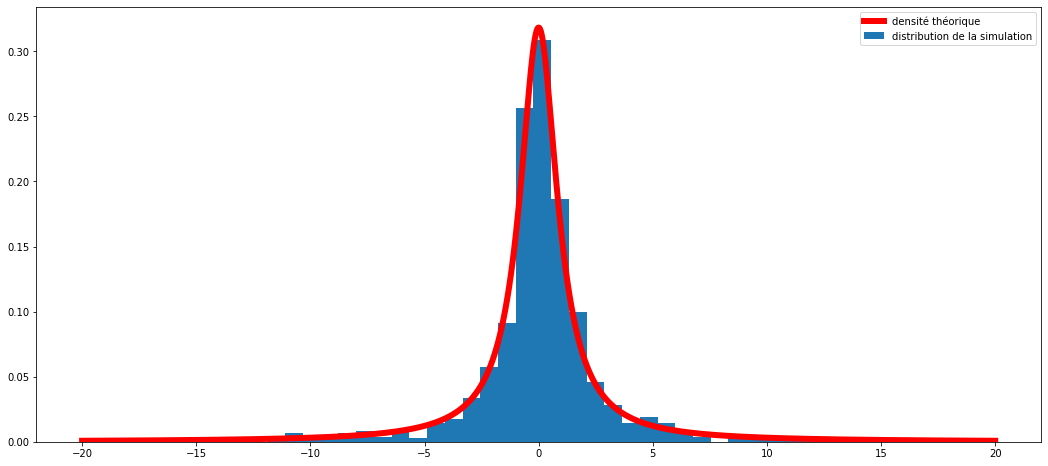

In [41]:
N=1000
Y=[]
max=20
for i in range(N):
    Y.append(Cauchy())
Y = [x for x in Y if abs(x)<max]
hist(Y,bins=50, density=1)
X=linspace(-max, max, N)
P=plot(X,1/pi*1/(1+X**2),linewidth=6,color="red")
legend(['densité théorique','distribution de la simulation'])
show()

### 2.5 Simulation d'une loi normale

On tire sur une cible munie d'un repère orthonormé centrée sur son origine $O$. On note $(X,Y)$ les coordonnées cartésienne d'un tir. On remarque que lorsque le tireur vise le centre de la cible, la loi suivie par $(X,Y)$ admet une densité 

$$f(x,y)=\dfrac{1}{2\pi} e^{\frac{-x^2-y^2}{2}}$$

On note $R$ la distance entre le point d'impact et le point visé. 

On donne les résultats suivants, démontrés en exercice : 
- Les variables $X$ et $Y$ sont indépendantes suivant chacune une loi normale centrée réduite.
- La loi suivie par la variable aléatoire  $R$ admet pour densité $f_R(r) = r e^{-r^2/2}1_{\mathbb{R}_+} $ (loi de Rayleigh). La variable $R^2$ suit une loi exponentielle $\mathcal{E}(1/2)$.
- Si $\Theta$ est la variable aléatoire telle que $X=R\cos(\Theta)$, $Y=R\sin(\Theta)$, alors $\Theta$ suit une loi uniforme sur l'intervalle $[0;2\pi]$

**Q24:** En déduire une simulation de la loi du couple $(X,Y)$.

In [42]:
def Normale2():
    theta = 2*pi*rand()
    r = sqrt(-2*log(rand()))
    return r*cos(theta),r*sin(theta)

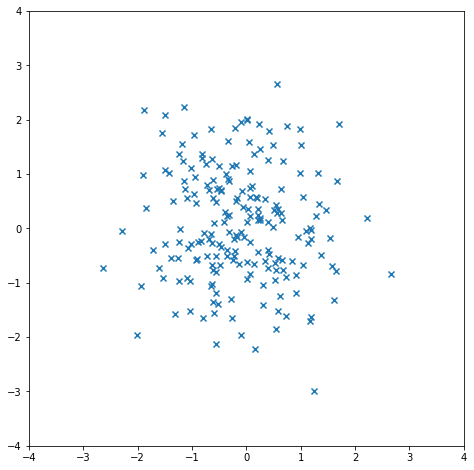

In [43]:
N=200
box=4
X=[]
Y=[]
for i in range(N):
    simu = Normale2()
    X.append(simu[0])
    Y.append(simu[1])
    
graphique = scatter(X,Y,marker='x')
axis([-box,box,-box,box])
gca().set_aspect('equal', adjustable='box')
show()

**Q25:** Quelle proportion de points se trouve dans le disque de centre $(0;0)$ et de rayon 2 ? Comparer à la valeur théorique que l'on devrait obtenir à la suite d'un calcul de probabilité.

In [44]:
S=0
for i in range(N):
    if X[i]**2+Y[i]**2<4:
        S=S+1
print(S/N)
print(1-exp(-2))

0.885
0.8646647167633873


<p style='color:#d50000'> Le résultat obtenu est proche de la probabilité $\mathbb{P}(R^2<4)=1-e^{-2}$. </p>

### 2.6 Simulation d'une loi géométrique

On souhaite simuler une variable aléatoire suivant une loi géométrique $\mathcal{G}(p)$. On propose ici 4 méthodes que l'on souhaite comparer.

__Méthode 1 :__ Pour tout $i \geq 1$, on pose $p_i=\mathbb{P}(X=i)$, on tire une variable uniforme $U$ sur $[0;1]$ et on renvoie l'entier $k$ tel que $$p_1+...+p_{k-1} < U < p_1+...+p_{k}$$

__Méthode 2 :__ On simule des variables aléatoires de Bernoulli de paramètre $p$ et on s'arrête à la première fois qu'on tombe sur 1.

__Méthode 3 :__ Soit $X$ une variable aléatoire suivant une loi expontielle $\mathcal{E}(1)$. On pose $\lambda = - \frac{1}{\ln(1-p)}$ et on renvoie  $\lceil \lambda X\rceil$ où $\lceil x \rceil$ désigne la partie entière par valeur supérieure de $x$, c'est-à-dire le plus petit entier $k$ tel que $k \geq x$.

__Méthode 4 :__ On utilise la fonction intégrée dans pylab appelée geometric.

**Q26:** Justifier que la méthode 1 donne le résultat escompté.


<p style='color:#d50000'> Méthode 1 : Pour tout $i \geq 1$, on pose $p_i=\mathbb{P}(X=i)$, on tire une variable uniforme $U$ sur $[0;1]$ et on renvoie le plus petit $k$ tel que $U < p_1+...+p_{k} = F(k)$ où $F$ est la fonction de répartition de $X$. Il s'agit donc de l'applicaton du théorème de simulation par inversion de la fonction de répartition cité ci-dessus.
</p>

**Q27:** Démontrer que la méthode 3 donne le résultat escompté.

<p style='color:#d50000'> Méthode 3 :  Soit $X$ une variable aléatoire suivant une loi expontielle $\mathcal{E}(1)$. On pose $\lambda = - \frac{1}{\ln(1-p)}$ et on définit  $Y=\lceil \lambda X\rceil$. On étudie la loi de $Y$ en calculant pour tout entier $k \geq 1$ la valeur de $\mathbb{P}(Y=k)$. Or 
    \begin{align*}
    \mathbb{P}(Y=k) &= \mathbb{P}(\lambda X \in ]k-1;k]) \\
    &= \mathbb{P}\left(\frac{k-1}{\lambda} \leq X \leq \frac{k}{\lambda} \right)\\
    &= \int_{\frac{k-1}{\lambda}}^{\frac{k}{\lambda}} e^{-x} dx \\
    &= e^{-\frac{k-1}{\lambda}}-e^{\frac{k}{\lambda}} \\
    &= (1-p)^{k-1}-(1-p)^k \\
    &= (1-p)^{k-1}p
    \end{align*}
    Donc $Y$ suit bien une loi géométrique de paramètre $p$.
    </p>

**Q28:** Compléter le programme suivant permettant d'implémenter ces 4 méthodes. On pourra utiliser la fonction  ceil() intégrée à  python permettant de calculer $\lceil x \rceil$.

In [45]:
def methode1(p):
    k=1
    S=p
    U=rand()
    while U>S:
        k=k+1
        S=S+p*(1-p)**(k-1)
    return k

def methode2(p):
    k=0
    b=0
    while b==0:
        b=Bernoulli(p)
        k=k+1
    return k

def methode3(p):
    X=-log(rand()) # on simule une loi exponentielle de paramètre 1
    return int(ceil(-1/log(1-p)*X))

def methode4(p):
    return geometric(p)

**Q29:** Afin de vérifier les programmes précédents, utiliser le programme suivant et interpréter le résultat. 

In [46]:
p=0.1
N=1000
S=0
for i in range(N):
    S=S+methode1(p)
print(S/N)

10.055


<p style='color:#d50000'> On calcule la moyenne sur 1000 simulations et on trouve dans cet exemple 10.1, ce qui est proche de l'espérance d'une loi géométrique de paramètre $p$ car cette espérance vaut $\frac{1}{p}$ qui vaut ici $10$.
    </p>

**Q30:** Comparer les temps d'exécution de chaque méthode.

In [47]:
from time import time

In [48]:
N=10000
p=0.1

t1 = time()
[methode1(p) for i in range(N)]
t2 = time()
temps1=t2-t1
print("La méthode 1 a pris {} secondes".format(temps1))

La méthode 1 a pris 0.060094594955444336 secondes


In [49]:
t1 = time()
[methode2(p) for i in range(N)]
t2 = time()
temps2=t2-t1
print("La méthode 2 a pris {} secondes".format(temps2))

La méthode 2 a pris 0.07990550994873047 secondes


In [50]:
t1 = time()
[methode3(p) for i in range(N)]
t2 = time()
temps3=t2-t1
print("La méthode 3 a pris {} secondes".format(temps3))

La méthode 3 a pris 0.10979795455932617 secondes


In [51]:
t1 = time()
[methode4(p) for i in range(N)]
t2 = time()
temps4=t2-t1
print("La méthode 4 a pris {} secondes".format(temps4))

La méthode 4 a pris 0.010226726531982422 secondes


## 3. Somme de variables aléatoires et produit de convolution

On rappelle que le produit de convolution de deux fonctions réelles $f$ et $g$ est défini par 
$$ f \star g (s) = \int_{\mathbb{R}} f(s-x)g(x)dx$$

**Q31:** Calculer $f \star f$ où $f$ est la fonction densité d'une loi normale centrée réduite. Que représente $f\star f$ ?

<p style='color:#d50000'>
On a $f(x)=\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}$ d'où 
    \begin{align*}
    f \star f(s) &= \int \frac{1}{2\pi} e^{-\frac{(s-x)^2}{2}}e^{-\frac{x^2}{2}}dx \\
    &= \int \frac{1}{2\pi}e^{-\frac{s^2}{4}-\frac{s^2}{4} + sx  -\frac{x^2}{2} -\frac{x^2}{2} }dx \\
        &= \int \frac{1}{2\pi}e^{-\frac{s^2}{4}-\left(\frac{s}{2}-x \right)^2 }dx \\
&= \frac{1}{2\pi} e^{-\frac{s^2}{4}} \int e^{-\left(\frac{s}{2}-x \right)^2 } dx \\
    &= \frac{1}{2\pi} e^{-\frac{s^2}{4}} \int_{-\infty}^{+\infty} e^{-u ^2 } du \\
    &= \frac{1}{2\pi} e^{-\frac{s^2}{4}} \int_{-\infty}^{+\infty} e^{-v^2/2 } \frac{1}{\sqrt{2}} dv \\
    &= \frac{1}{2\pi} e^{-\frac{s^2}{4}} \frac{\sqrt{2\pi}}{\sqrt{2}} \\
    &= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{s^2}{2\sigma^2}}
    \end{align*}
    où $\sigma = \sqrt{2}$. On a ainsi montré que $f \star f$ est la densité d'une loi normale $\mathcal{N}(0,\sigma^2=2)$. C'est la loi d'une somme de deux variables aléatoires indépendantes suivant chacune une loi normale $\mathcal{N}(0,1)$.
</p>

**Q32:** Représenter graphiquement ce résultat.

In [52]:
max = +8
dx = 1e-3
grid = arange(-max,max,dx)

In [53]:
from scipy.signal import fftconvolve

In [54]:
pmf = [dnormale(x,0,1)*dx for x in grid] # probability mass function
pdf = array(pmf)/dx             #probability density function
conv_pmf = fftconvolve(pmf,pmf,'same')
conv_pdf = (array(conv_pmf)/dx)

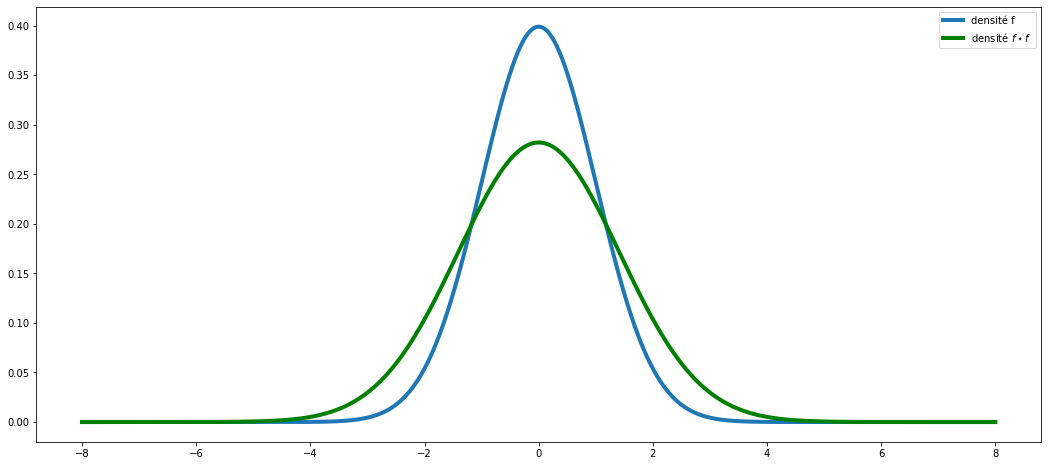

In [55]:
plot(grid,pdf,linewidth=4)
plot(grid,conv_pdf,linewidth=4,color="green")

legend(['densité f','densité $f\star f$'])
show()

**Q33:** Représenter graphiquement la loi de chaque variable $X_1+...+X_k$ pour $k \in \{2;6\}$ où les variables $X_i$ sont i.i.d. selon une loi uniforme sur $[-1;1]$.

In [56]:
pmf = [duniforme(x,-1,1)*dx for x in grid] # probability mass function
pdf = array(pmf)/dx
conv_pmf=[pmf]
conv_pdf=[pdf]
N=5
for i in range(N):
    conv = fftconvolve(conv_pmf[-1],pmf,'same')
    conv_pmf.append(conv)
    conv_pdf.append(array(conv/dx))

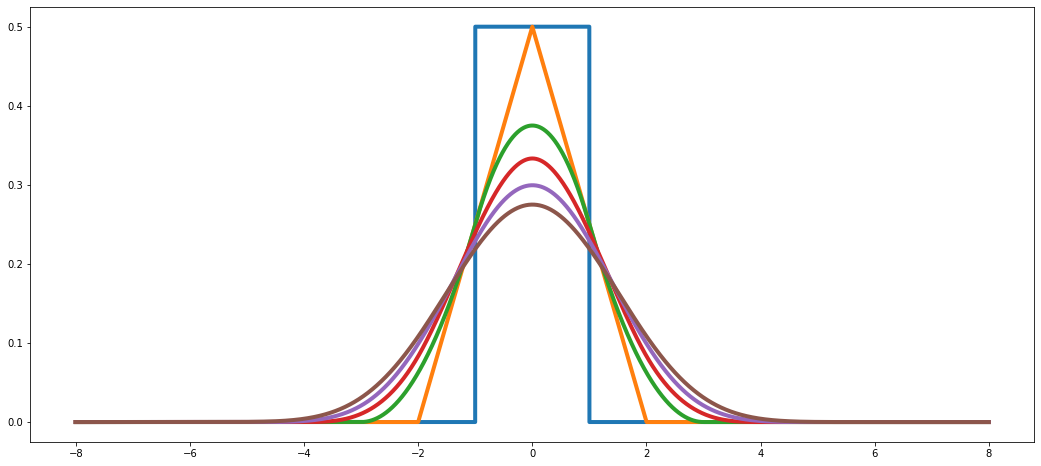

In [57]:
for i in range(N+1):
    plot(grid,conv_pdf[i],linewidth=4)

<p style='color:#d50000'> La suite de variables aléatoires $X_1+...+X_n$ semble converger vers une loi normale. Ce résultat sera précisé ultérieurement avec le théorème central limite. </p>

In [58]:
TEST = []
for i in range(1000):
    TEST.append(rand()-rand())

(array([ 15.,  82.,  98., 118., 177., 172., 144., 111.,  61.,  22.]),
 array([-0.98639285, -0.79132263, -0.59625241, -0.40118219, -0.20611197,
        -0.01104175,  0.18402846,  0.37909868,  0.5741689 ,  0.76923912,
         0.96430934]),
 <a list of 10 Patch objects>)

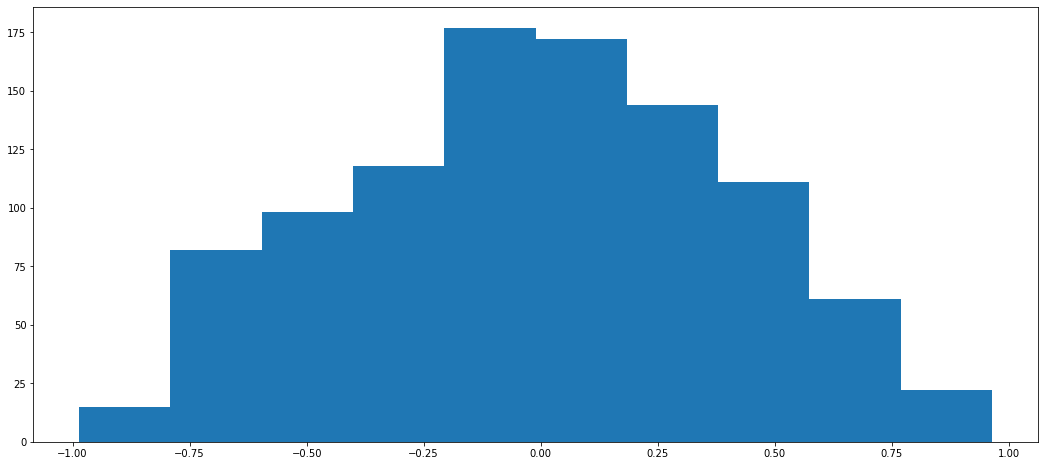

In [59]:
hist(TEST)

In [60]:
Uniforme(0,1)

0.5862729458886923

In [61]:
Uniforme(0,1)

0.20288908817619178

In [62]:
cos(2)

-0.4161468365471424

In [63]:
exp(2)

7.38905609893065

In [68]:
N=100000
S=0
for i in range(N):
    X = Uniforme(0,1)
    S = S + cos(X**3)*exp(-X)
print(S/N)

0.6029502771446977


In [69]:
Exponentielle(1)

1.0027677281403853

In [75]:
N=100000
S=0
for i in range(N):
    X = Exponentielle(1)
    if X < 1 and X > 0:
        S = S+cos(X**3)
print(S/N)

0.602589825673313
